In [0]:
import pandas as pd
import math
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import copy

In [0]:
analyser = SentimentIntensityAnalyzer()

In [0]:
on_campus = pd.read_csv('on_campus.csv' , na_values = 0)
off_campus = pd.read_csv('off_campus.csv' , na_values = 0)
housing = pd.read_csv('housing.csv' , na_values = 0)
dorm = pd.read_csv('dorm.csv' , na_values = 0)

In [0]:
def replace_nan(df):
  for i in range(len(df)):
    if type(df['title'][i]) == float and math.isnan(df['title'][i]):
      df['title'][i] = '0'
    if type(df['body'][i]) == float and math.isnan(df['body'][i]):
      df['body'][i] = '0'
    if type(df['score'][i]) == np.float64 and math.isnan(df['score'][i]):
      df['score'][i] = '0'
  return df

In [0]:
oncampus = replace_nan(on_campus)
offcampus = replace_nan(off_campus)
housing = replace_nan(housing)
dorm = replace_nan(dorm)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
oncampus_title = np.array(oncampus['title'])
oncampus_name = np.array(oncampus['name'])
oncampus_body = np.array(oncampus['body'])
oncampus_score = np.array(oncampus["score"])
offcampus_title = np.array(offcampus['title'])
offcampus_name = np.array(offcampus['name'])
offcampus_body = np.array(offcampus['body'])
offcampus_score = np.array(offcampus["score"])
housing_title = np.array(housing['title'])
housing_body = np.array(housing['body'])
housing_score = np.array(housing['score'])
dorm_title = np.array(dorm['title'])
dorm_body = np.array(dorm['body'])

In [0]:
def replace_name_by_regions(list_names):
  for i in range(len(list_names)):
    if (list_names[i] == "UIUC") | (list_names[i] == "osu") | (list_names[i] == "uofm") | (list_names[i] == "Purdue") | (list_names[i] == "msu") | (list_names[i] == "UWMadison") | (list_names[i] == "uofmn") | (list_names[i] == "IndianaUniversity") :
      list_names[i] = 'N'
    elif (list_names[i] == "berkeley") | (list_names[i] == "ucla") | (list_names[i] == "UCSantaBarbara") | (list_names[i] == "ucsd") | (list_names[i] == "asu") | (list_names[i] == "ucdavis") | (list_names[i] == "CalPoly") | (list_names[i] == "ucsc") | (list_names[i] == "USC"):
      list_names[i] = 'W'
    elif (list_names[i] == "UTAustin") | (list_names[i] == "aggies") | (list_names[i] == "LSU") | (list_names[i] == "UniversityOfHouston"):
      list_names[i] = 'S'
    elif (list_names[i] == "UBC") | (list_names[i] == "udub") | (list_names[i] == "mcgill"):
      list_names[i] = 'O'
    else:
      list_names[i] = 'E'
  return list_names

In [0]:
oncampus_region = copy.deepcopy(oncampus_name)
offcampus_region = copy.deepcopy(offcampus_name)

In [0]:
oncampus_region = replace_name_by_regions(oncampus_region)
offcampus_region = replace_name_by_regions(offcampus_region)

array(['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N'], dtype=object)

In [0]:
def get_score(text , sentiment):
  score = analyser.polarity_scores(text)[sentiment]
  return score

In [0]:
def get_total_score(text_list , score_list , sentiment):
  score = 0
  weight = 0
  for i in range(len(score_list)):
    score_list[i] = score_list[i] + 1
  
  for i in range(len(text_list)):
    score = score + (get_score(text_list[i] , sentiment))*(score_list[i])
  
  return score/len(text_list)

In [0]:
def get_score_for_set(a_tuple , score_list , sentiment):
  a = a_tuple[0]
  b = a_tuple[1]
  return (get_total_score(a,score_list,sentiment) + get_total_score(b,score_list,sentiment))/2

## Sentiment over all universities , an average

In [0]:
print(get_score_for_set((oncampus_title , oncampus_body), oncampus_score, 'compound'))
print(get_score_for_set((oncampus_title , oncampus_body), oncampus_score, 'pos'))
print(get_score_for_set((oncampus_title , oncampus_body), oncampus_score, 'neg'))
print(get_score_for_set((oncampus_title , oncampus_body), oncampus_score, 'neu'))

3.109151795454548
2.480093295454548
1.3198078409090925
19.964635454545483


In [0]:
print(get_score_for_set((offcampus_title , offcampus_body), offcampus_score, 'compound'))
print(get_score_for_set((offcampus_title , offcampus_body), offcampus_score, 'pos'))
print(get_score_for_set((offcampus_title , offcampus_body), offcampus_score, 'neg'))
print(get_score_for_set((offcampus_title , offcampus_body), offcampus_score, 'neu'))

2.2259992016205894
1.1888892993326983
0.6245474261201146
13.357454837940868


## Sentiment over regions - N,S,W,E

In [0]:
def find_region_intervals(region_info , region):
  r = []
  for i in range(len(region_info)):
    if region_info[i] == region:
      r.append(i)
  return r

In [0]:
def sentiment_over_region(text_info , score_info , region_info , region):
  r = find_region_intervals(region_info , region)
  text = []
  score = []
  for i in r:
    text.append(text_info[i])
    score.append(score_info[i])
  return text , score

In [0]:
oncampus_title_N , oncampus_score_N = sentiment_over_region(oncampus_title , oncampus_score , oncampus_region , 'N')
oncampus_body_N , _ = sentiment_over_region(oncampus_body , oncampus_score , oncampus_region , 'N')
oncampus_title_S , oncampus_score_S = sentiment_over_region(oncampus_title , oncampus_score , oncampus_region , 'S')
oncampus_body_S , _ = sentiment_over_region(oncampus_body , oncampus_score , oncampus_region , 'S')
oncampus_title_W , oncampus_score_W = sentiment_over_region(oncampus_title , oncampus_score , oncampus_region , 'W')
oncampus_body_W , _ = sentiment_over_region(oncampus_body , oncampus_score , oncampus_region , 'W')
oncampus_title_E , oncampus_score_E = sentiment_over_region(oncampus_title , oncampus_score , oncampus_region , 'E')
oncampus_body_E , _ = sentiment_over_region(oncampus_body , oncampus_score , oncampus_region , 'E')

In [0]:
offcampus_title_N , offcampus_score_N = sentiment_over_region(offcampus_title , offcampus_score , offcampus_region , 'N')
offcampus_body_N , _ = sentiment_over_region(offcampus_body , offcampus_score , offcampus_region , 'N')
offcampus_title_S , offcampus_score_S = sentiment_over_region(offcampus_title , offcampus_score , offcampus_region , 'S')
offcampus_body_S , _ = sentiment_over_region(offcampus_body , offcampus_score , offcampus_region , 'S')
offcampus_title_W , offcampus_score_W = sentiment_over_region(offcampus_title , offcampus_score , offcampus_region , 'W')
offcampus_body_W , _ = sentiment_over_region(offcampus_body , offcampus_score , offcampus_region , 'W')
offcampus_title_E , offcampus_score_E = sentiment_over_region(offcampus_title , offcampus_score , offcampus_region , 'E')
offcampus_body_E , _ = sentiment_over_region(offcampus_body , offcampus_score , offcampus_region , 'E')

## Sentiment over N

In [0]:
print(get_score_for_set((oncampus_title_N , oncampus_body_N), oncampus_score_N, 'compound'))
print(get_score_for_set((oncampus_title_N , oncampus_body_N), oncampus_score_N, 'pos'))
print(get_score_for_set((oncampus_title_N , oncampus_body_N), oncampus_score_N, 'neg'))
print(get_score_for_set((oncampus_title_N , oncampus_body_N), oncampus_score_N, 'neu'))

8.181449749999997
5.582620000000002
2.2416175000000003
38.206568749999995


In [0]:
print(get_score_for_set((offcampus_title_N , offcampus_body_N), offcampus_score_N, 'compound'))
print(get_score_for_set((offcampus_title_N , offcampus_body_N), offcampus_score_N, 'pos'))
print(get_score_for_set((offcampus_title_N , offcampus_body_N), offcampus_score_N, 'neg'))
print(get_score_for_set((offcampus_title_N , offcampus_body_N), offcampus_score_N, 'neu'))

8.729500970245804
3.6608570504527833
1.3951888745148768
33.996166235446296


## Sentiment over S

In [0]:
print(get_score_for_set((oncampus_title_S , oncampus_body_S), oncampus_score_S, 'compound'))
print(get_score_for_set((oncampus_title_S , oncampus_body_S), oncampus_score_S, 'pos'))
print(get_score_for_set((oncampus_title_S , oncampus_body_S), oncampus_score_S, 'neg'))
print(get_score_for_set((oncampus_title_S , oncampus_body_S), oncampus_score_S, 'neu'))

7.089678125000002
4.888081249999998
2.1897775
39.17169000000001


In [0]:
print(get_score_for_set((offcampus_title_S , offcampus_body_S), offcampus_score_S, 'compound'))
print(get_score_for_set((offcampus_title_S , offcampus_body_S), offcampus_score_S, 'pos'))
print(get_score_for_set((offcampus_title_S , offcampus_body_S), offcampus_score_S, 'neg'))
print(get_score_for_set((offcampus_title_S , offcampus_body_S), offcampus_score_S, 'neu'))

9.141716944444449
3.8589527777777795
1.5028597222222224
33.168177777777785


## Sentiment over W

In [0]:
print(get_score_for_set((oncampus_title_W , oncampus_body_W), oncampus_score_W, 'compound'))
print(get_score_for_set((oncampus_title_W , oncampus_body_W), oncampus_score_W, 'pos'))
print(get_score_for_set((oncampus_title_W , oncampus_body_W), oncampus_score_W, 'neg'))
print(get_score_for_set((oncampus_title_W , oncampus_body_W), oncampus_score_W, 'neu'))

12.56977194444443
7.243426111111115
2.778173888888889
63.2592838888889


In [0]:
print(get_score_for_set((offcampus_title_W , offcampus_body_W), offcampus_score_W, 'compound'))
print(get_score_for_set((offcampus_title_W , offcampus_body_W), offcampus_score_W, 'pos'))
print(get_score_for_set((offcampus_title_W , offcampus_body_W), offcampus_score_W, 'neg'))
print(get_score_for_set((offcampus_title_W , offcampus_body_W), offcampus_score_W, 'neu'))

7.741157888888894
3.1847977777777787
1.377306111111111
34.08184444444446


## Sentiment over E

In [0]:
print(get_score_for_set((oncampus_title_E , oncampus_body_E), oncampus_score_E, 'compound'))
print(get_score_for_set((oncampus_title_E , oncampus_body_E), oncampus_score_E, 'pos'))
print(get_score_for_set((oncampus_title_E , oncampus_body_E), oncampus_score_E, 'neg'))
print(get_score_for_set((oncampus_title_E , oncampus_body_E), oncampus_score_E, 'neu'))

8.640690324999994
5.2817395000000005
2.3686974999999997
43.91546300000004


In [0]:
print(get_score_for_set((offcampus_title_E , offcampus_body_E), offcampus_score_E, 'compound'))
print(get_score_for_set((offcampus_title_E , offcampus_body_E), offcampus_score_E, 'pos'))
print(get_score_for_set((offcampus_title_E , offcampus_body_E), offcampus_score_E, 'neg'))
print(get_score_for_set((offcampus_title_E , offcampus_body_E), offcampus_score_E, 'neu'))

7.714499865807854
3.265230273752013
1.032972624798712
32.668134728931804


## Sentiment over different universities

In [0]:
def give_range_for_uni(name_info , name):
  r = []
  for i in range(len(name_info)):
    if name_info[i] == name:
      r.append(i)
  return (r[0],r[-1]+1)

In [0]:
def get_uni_data(text_info , score_info, name_info , name):
  text = copy.deepcopy(text_info)
  x,y = give_range_for_uni(name_info , name)
  return text[x:y] , score_info[x:y] , name

In [0]:
def get_all_uni_data(text_info , score_info ,name_info):
  list1 = list(set(name_info))
  compiled_list = []
  compiled_scores = []
  compiled_names = []
  for i in list1:
    a , b , c = get_uni_data(text_info , score_info, name_info , i)
    compiled_list.append(a)
    compiled_scores.append(b)
    compiled_names.append(c)
  return compiled_list , compiled_scores , compiled_names

In [0]:
oncampus_title_compiled , oncampus_score_compiled , oncampus_name_compiled = get_all_uni_data(oncampus_title , oncampus_score, oncampus_name)
oncampus_body_compiled , _ , _= get_all_uni_data(oncampus_body , oncampus_score, oncampus_name)

In [0]:
offcampus_title_compiled , offcampus_score_compiled , offcampus_name_compiled = get_all_uni_data(offcampus_title , offcampus_score, offcampus_name)
offcampus_body_compiled , _ , _ = get_all_uni_data(offcampus_body , offcampus_score, offcampus_name)

In [0]:
for i in range(len(oncampus_score_compiled)):
  print("The results for {} are : ".format(oncampus_name_compiled[i]))
  print(get_score_for_set((oncampus_title_compiled[i] , oncampus_body_compiled[i]), oncampus_score_compiled[i], 'compound'))
  print(get_score_for_set((oncampus_title_compiled[i] , oncampus_body_compiled[i]), oncampus_score_compiled[i], 'pos'))
  print(get_score_for_set((oncampus_title_compiled[i] , oncampus_body_compiled[i]), oncampus_score_compiled[i], 'neg'))
  print(get_score_for_set((oncampus_title_compiled[i] , oncampus_body_compiled[i]), oncampus_score_compiled[i], 'neu'))
  print("**************************")

The results for Pitt are : 
3.5128774999999997
2.4778600000000006
1.2494150000000002
20.097124999999995
**************************
The results for IndianaUniversity are : 
4.163951
2.4442399999999993
0.38101000000000007
13.896469999999997
**************************
The results for UGA are : 
1.0576135000000004
1.7464849999999998
1.13746
13.768525
**************************
The results for rutgers are : 
-1.8186469999999992
1.8981
1.6855450000000003
20.622035000000004
**************************
The results for UWMadison are : 
4.595242999999999
2.88153
0.9948000000000001
18.162704999999995
**************************
The results for ucdavis are : 
1.8902299999999996
3.1020249999999994
2.0186450000000002
22.990759999999998
**************************
The results for mcgill are : 
3.822100999999999
2.11999
0.96288
18.186310000000002
**************************
The results for ucsc are : 
3.8569745000000006
2.532375000000001
1.263535
20.010334999999998
**************************
The results f

In [0]:
for i in range(len(offcampus_score_compiled)):
  print("The results for {} are : ".format(offcampus_name_compiled[i]))
  print(get_score_for_set((offcampus_title_compiled[i] , offcampus_body_compiled[i]), offcampus_score_compiled[i], 'compound'))
  print(get_score_for_set((offcampus_title_compiled[i] , offcampus_body_compiled[i]), offcampus_score_compiled[i], 'pos'))
  print(get_score_for_set((offcampus_title_compiled[i] , offcampus_body_compiled[i]), offcampus_score_compiled[i], 'neg'))
  print(get_score_for_set((offcampus_title_compiled[i] , offcampus_body_compiled[i]), offcampus_score_compiled[i], 'neu'))
  print("**************************")

The results for Pitt are : 
1.9293865000000003
0.9057099999999999
0.40193
14.153175000000001
**************************
The results for IndianaUniversity are : 
2.706863698630138
1.0551164383561642
0.27897260273972607
12.476575342465754
**************************
The results for UGA are : 
2.5498285000000003
1.308995
0.504425
11.673335
**************************
The results for rutgers are : 
1.267779
0.7870349999999998
0.610285
12.251189999999998
**************************
The results for UWMadison are : 
3.2524464999999987
3.1612199999999993
1.670505
19.487339999999996
**************************
The results for ucdavis are : 
2.7155515
1.1242249999999998
0.6019800000000001
15.29685
**************************
The results for mcgill are : 
2.5793524999999997
1.213065
0.9388550000000001
13.816190000000004
**************************
The results for ucsc are : 
1.7825884999999992
1.03654
0.38358500000000006
13.638794999999996
**************************
The results for msu are : 
2.2351164

In [0]:
df = []
tanjiro = []
for i in range(len(offcampus_score_compiled)):
  tanjiro.append(offcampus_name_compiled[i])
  tanjiro.append(get_score_for_set((offcampus_title_compiled[i] , offcampus_body_compiled[i]), offcampus_score_compiled[i], 'compound'))
  tanjiro.append(get_score_for_set((offcampus_title_compiled[i] , offcampus_body_compiled[i]), offcampus_score_compiled[i], 'pos'))
  tanjiro.append(get_score_for_set((offcampus_title_compiled[i] , offcampus_body_compiled[i]), offcampus_score_compiled[i], 'neg'))
  df.append(tanjiro)
  tanjiro = []

In [0]:
df_offcampus = pd.DataFrame(df, columns = ['University Name', 'Compound' , 'Positive' , 'Negative'])
df_offcampus.to_csv('university_offcampus.csv', index=False)

# Making hapiness curves

In [0]:
print(get_score_for_set((oncampus_title , oncampus_body), oncampus_score, 'compound'))
print(get_score_for_set((oncampus_title , oncampus_body), oncampus_score, 'pos'))
print(get_score_for_set((oncampus_title , oncampus_body), oncampus_score, 'neg'))
print(get_score_for_set((oncampus_title , oncampus_body), oncampus_score, 'neu'))

In [0]:
def get_curve_data(text_info1 , text_info2 , score_info , sentiment):
  curve_data = []
  tet = []
  for i in range(len(text_info1)):
    s1 = get_score(text_info1[i] , sentiment) * (score_info[i])
    s2 = get_score(text_info2[i] , sentiment) * (score_info[i])
    s = (s1 + s2) / 2
    if s > 25:
      tet.append([text_info1[i],text_info2[i]])
    curve_data.append(s)
  return np.array(curve_data) , np.array(tet)

In [0]:
a , b = get_curve_data(offcampus_title , offcampus_body , offcampus_score , 'neg')

In [0]:
b[7]

array(['I’m tired of not feeling safe off campus. [Rant]',
       'I like going to UW. I like my classes, my major, my professors, etc. But I HATE going off campus.\n\nYesterday, on my way back from Trader Joe’s a homeless man high off who knows what, masterbated  in front of me.....at 9AM. A few weeks ago there were stabbings on the Ave. Before that, my friend got a knife pulled on him while walking home. Last year, one of my closest friends (an extremely fit/strong man) was jumped and beaten up pretty bad. When I hold my girlfriends hand in public (off campus) often we get catcalled, asked to kiss, people touch themselves...(we’re lesbians). \n\nI’m tired of clutching my pepper spray every time I walk on the Ave or anywhere in the U-District. I’m tired of feeling scared when my friends or loved ones go out late at night. I’m tired of not feeling safe.\n\nI’m from another major city, and our homeless population and crime was no where near this prominent. As a naive freshmen, I despera

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([3.718e+03, 2.270e+02, 7.300e+01, 4.800e+01, 3.800e+01, 1.900e+01,
        1.100e+01, 7.000e+00, 9.000e+00, 5.000e+00, 6.000e+00, 4.000e+00,
        2.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

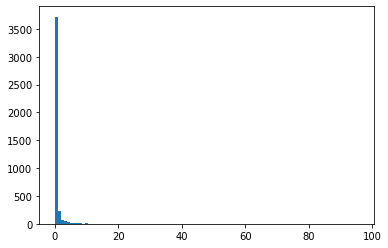

In [0]:
plt.hist(a , bins = 100)

In [0]:
def create_5_number_summaries(data):
  min_data = data.min()
  max_data = data.max()
  quartiles = np.percentile(data , [25 , 50 ,75])
  print("The min value is : {}".format(min_data))
  print("The 1st quartile value is : {}".format(quartiles[0]))
  print("The median value is : {}".format(quartiles[1]))
  print("The 3rd quartile is : {}".format(quartiles[2]))
  print("The max value is : {}".format(max_data))

In [0]:
create_5_number_summaries(a)

The min value is : 0.0
The 1st quartile value is : 0.256
The median value is : 0.637
The 3rd quartile is : 1.44225
The max value is : 124.254
